# 第六組 - 社群媒體分析期末報告 - 館椅大戰
報告影片: https://www.youtube.com/watch?v=3e17nOdNJLU

+ 組員：
    + M1140200016 卓裕超
    + M1140200025 謝允翔
    + B084020032 王郁文
    + B082020038 簡奕先

# 動機和分析目的
從2022年12月，到今年年初，知名電競選手兼YouTuber Toyz（劉偉健）與網紅館長陳之漢在各自媒體平台上，同時開了15小時的直播隔空交火，此事件在網路世界上鬧得沸沸揚揚。  

下圖為Toyz在事件發生前，Toyz與館長原本預計簽約150萬的訓練代言，並於2022年12月29日到館長所創辦的成吉思汗健身房進行第一次的訓練，Toyz在訓練中被館長打倒在地，事後開直播怒嗆館長:「很明顯啊，那個肌肉棒子就在公報私仇啊！」讓館長認為Toyz不尊師重道而撤回簽約約定，引發雙方火線。爭論過程兩方與兩方的粉絲都各執一詞，爭吵內容也開始不僅限於「簽約」與「健身房」，例如爭吵內容也延伸到Toyz所開的「拾汣茶屋」，其中的飲品「橙芝汗」疑似有意意指館長「陳之漢」。  

從上次我們分析在這個複雜的過程中，PPT網友對此議題的情緒表達沒有我們想像中的負面，對於館長和Toyz互相開嗆，大多數網友是站在隔岸觀火、湊熱鬧的角度。    

這次我們則是試著分析主題和文章、網友之間的關係，找出網友們最重視的內容和網友中的重要角色。  

![Alt Text](https://s.yimg.com/ny/api/res/1.2/4HFm1cZEUoCl9EocEzqJMQ--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTM3MA--/https://media.zenfs.com/zh-tw/nownews.hk/2909781b9d3b8888e457de47b18baf7d)

# 資料集描述
- **資料來源:** PPT八卦版(Gossiping)  
- **資料數:** 共3151筆文章  
- **關鍵字:** toyz、館長  
- **資料期間:** 2022/12/01 - 2023/04/18  
- **資料擷取方式:** 使用文字分析工作流程系統進行爬蟲

# LDA主題模型

## 1. 套件
+ gensim: 主題模型函式庫
+ pyLDAvis: 互動式LDA視覺化套件

In [17]:
import time 
from functools import reduce
from collections import Counter
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus

import pyLDAvis
import pyLDAvis.gensim


In [18]:
import warnings
warnings.filterwarnings('ignore') 

In [19]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Text(0.5, 1.0, '聲量圖')

2023-06-12 10:57:08,293 : WARNING : findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
2023-06-12 10:57:08,294 : WARNING : findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


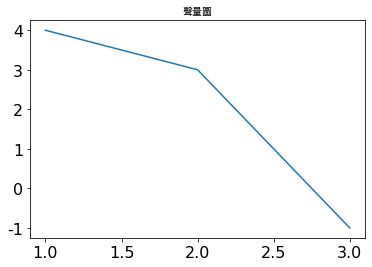

In [20]:
# from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
myfont =  FontProperties(fname = 'C:/Users/USER/AppData/Local/Programs/Python/Python39/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')

# font_set = {f.name for f in font_manager.fontManager.ttflist}
# matplotlib.rcParams['font.family'] = ['Noto Sans Mono CJK TC', 'sans-serif']
plt.rcParams['font.size'] = 16
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
plt.plot((1, 2, 3), (4, 3, -1))
plt.title("聲量圖", fontproperties=myfont)

## 2. 資料前處理

In [21]:
df = pd.read_csv("project1.csv")  # 匯資料
df.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669824097....,Re:[問卦]館長向全台最大黑道宣戰都不怕出事？,2022-12-01 00:01:35,thegreatlcx,Gossiping,我是想一件事很不明白\n照阿館所說\n對阿館開槍的背後真的是當今朝廷\n有點不合理呀\n\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""shvzrrsy"", ""...",123.192.152.105,2022-12-02 01:27:18,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1669825911....,Re:[問卦]館長商品推薦什麼的八卦？,2022-12-01 00:31:49,tyo5151,Gossiping,這還要用問，當然首推手錶啊\n\n粉絲讚不絕口可以留給下一代當傳家寶\nhttps://i....,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""milkool"", ""c...",223.138.89.157,2022-12-02 01:27:30,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1669855917....,[新聞]館長開戰！直播公布「陳明文委員」電話,2022-12-01 08:51:54,silence0930,Gossiping,1.媒體來源:\n中時\n\n2.記者署名:\n黃朝郁\n\n3.完整新聞標題:\n館長開戰...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""AndyZer"", ""c...",114.38.35.178,2022-12-02 01:28:38,ptt


In [22]:
df.shape

(3151, 11)

In [23]:
#英文轉成全部小寫
df["artContent"] = df["artContent"].str.lower() 

In [24]:
# 清洗資料
clear_df = df.copy()
clear_df.dropna(axis=0, how='any') #去除有包含空值的筆數
clear_df = clear_df.replace(r'\\n\\n', '。', regex=True).replace(r'\n', '', regex=True) #用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) #移除內文中的網址


In [25]:
# 斷句跟清洗
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")
sent_df = clear_df.explode('sentence').reset_index(drop=True)
# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

In [26]:
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s\d]+', '', regex=True).astype(str)
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

In [ ]:
# jieba
# 設定繁體中文詞庫
jieba.set_dictionary("../dict/dict.txt")
# 載入自定義辭典：一個詞一行，每行分詞語、詞頻(可省)、詞性(可省)
jieba.load_userdict('../dict/user_dict.txt')


In [ ]:
# jieba斷詞
word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)
word_df = word_df.loc[word_df['word'].str.len()>1]
word_df.head()

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669824097....,Re:[問卦]館長向全台最大黑道宣戰都不怕出事？,2022-12-01 00:01:35,thegreatlcx,Gossiping,我是想一件事很不明白照阿館所說對阿館開槍的背後真的是當今朝廷有點不合理呀因為當初2020年的...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""shvzrrsy"", ""...",123.192.152.105,2022-12-02 01:27:18,ptt,一件
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669824097....,Re:[問卦]館長向全台最大黑道宣戰都不怕出事？,2022-12-01 00:01:35,thegreatlcx,Gossiping,我是想一件事很不明白照阿館所說對阿館開槍的背後真的是當今朝廷有點不合理呀因為當初2020年的...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""shvzrrsy"", ""...",123.192.152.105,2022-12-02 01:27:18,ptt,明白
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669824097....,Re:[問卦]館長向全台最大黑道宣戰都不怕出事？,2022-12-01 00:01:35,thegreatlcx,Gossiping,我是想一件事很不明白照阿館所說對阿館開槍的背後真的是當今朝廷有點不合理呀因為當初2020年的...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""shvzrrsy"", ""...",123.192.152.105,2022-12-02 01:27:18,ptt,阿館
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669824097....,Re:[問卦]館長向全台最大黑道宣戰都不怕出事？,2022-12-01 00:01:35,thegreatlcx,Gossiping,我是想一件事很不明白照阿館所說對阿館開槍的背後真的是當今朝廷有點不合理呀因為當初2020年的...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""shvzrrsy"", ""...",123.192.152.105,2022-12-02 01:27:18,ptt,阿館
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669824097....,Re:[問卦]館長向全台最大黑道宣戰都不怕出事？,2022-12-01 00:01:35,thegreatlcx,Gossiping,我是想一件事很不明白照阿館所說對阿館開槍的背後真的是當今朝廷有點不合理呀因為當初2020年的...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""shvzrrsy"", ""...",123.192.152.105,2022-12-02 01:27:18,ptt,開槍


In [ ]:
# 新增stopwords
stopwords = [line.strip() for line in open('../dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

In [ ]:
# 移除stopwords
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df.head()

In [ ]:
# 產生詞頻
freq_df = pd.DataFrame({'freq':noStop_df.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df = freq_df[clist]
freq_df.head(20)


In [ ]:
# 字詞合併
combine_df = noStop_df.groupby(['artUrl','artTitle','artDate','artPoster','artContent','artComment'])['word'].apply(list).reset_index(name="words")

In [ ]:
combine_df.shape

(3071, 7)

In [ ]:
combine_df

,artUrl,artTitle,artDate,artPoster,artContent,artComment,words
0,https://www.ptt.cc/bbs/Gossiping/M.1669824097....,Re:[問卦]館長向全台最大黑道宣戰都不怕出事？,2022-12-01 00:01:35,thegreatlcx,我是想一件事很不明白照阿館所說對阿館開槍的背後真的是當今朝廷有點不合理呀因為當初2020年的...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""shvzrrsy"", ""...","[一件, 明白, 阿館, 阿館, 開槍, 背後, 當今, 朝廷, 合理, 當初, 2020,..."
1,https://www.ptt.cc/bbs/Gossiping/M.1669825911....,Re:[問卦]館長商品推薦什麼的八卦？,2022-12-01 00:31:49,tyo5151,這還要用問，當然首推手錶啊粉絲讚不絕口可以留給下一代當傳家寶https://i.imgur....,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""milkool"", ""c...","[用問, 首推, 手錶, 粉絲, 讚不絕口, 留給, 下一代, 傳家寶, iphone]"
2,https://www.ptt.cc/bbs/Gossiping/M.1669855917....,[新聞]館長開戰！直播公布「陳明文委員」電話,2022-12-01 08:51:54,silence0930,1.媒體來源:中時2.記者署名:黃朝郁3.完整新聞標題:館長開戰！直播公布「陳明文委員」電話...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""AndyZer"", ""c...","[媒體, 來源, 中時, 記者, 署名, 朝郁, 完整, 新聞, 標題, 館長, 開戰, 直..."
3,https://www.ptt.cc/bbs/Gossiping/M.1669859150....,Re:[新聞]館長開戰！直播公布「陳明文委員」電話,2022-12-01 09:45:48,poki5566,推 vvizz: 然後遊行都一堆黑衣刺青仔參加，說自己反 111.82.229.236...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""InfinitySA"",...","[vvizz, 遊行, 一堆, 黑衣, 刺青, 參加, 11182229236, 1201,..."
4,https://www.ptt.cc/bbs/Gossiping/M.1669871385....,Re:[新聞]轟台智光綁架！95%業務在北市府是「怪案,2022-12-01 13:09:43,jeff17,"柯文哲說他當市長主要心力放在解決問題,不想花太多心力去追究前朝的怪事現在都要卸任了,不用管市...","[{""cmtStatus"": ""→"", ""cmtPoster"": ""su4vu6"", ""cm...","[柯文哲, 他當, 市長, 主要, 心力, 解決, 問題, 不想花, 太多, 心力, 追究,..."
...,...,...,...,...,...,...,...
3066,https://www.ptt.cc/bbs/Gossiping/M.1681733034....,[問卦]月薪五千讓你當統神國動館長粉絲點解,2023-04-17 20:03:52,qazStarStar,晚上好我陽交大阿肥啦如果接下來每個月你都能領五千元但前提是你必須成為統神 國動 館長其中一位...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""LawLawDer"", ...","[晚上, 我陽, 交大, 阿肥, 每個, 領五千元, 前提, 成為, 統神, 國動, 館長,..."
3067,https://www.ptt.cc/bbs/Gossiping/M.1681734452....,[問卦]館長升職主管是投票制度的八卦？,2023-04-17 20:27:30,h2030625,昨天館長在講伊森說他會離職是因為升主管沒票選上才離職的第一次聽到升主管是員工投票 票高的升職...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""james732"", ""...","[昨天, 館長, 在講, 伊森, 離職, 主管, 票選, 離職, 聽到, 主管, 員工, 投..."
3068,https://www.ptt.cc/bbs/Gossiping/M.1681737207....,Re:[問卦]台灣物價484已經失控惹?,2023-04-17 21:13:25,KENDO777,館長說台灣的物價已經漲到無法無天現在應該第一件事就是讓館長出征俄羅斯直接結束烏俄戰爭讓台灣的...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tku9527"", ""c...","[館長, 台灣, 物價, 漲到, 無法無天, 現在, 館長, 出征, 俄羅斯, 直接, 結束..."
3069,https://www.ptt.cc/bbs/Gossiping/M.1681740134....,[問卦]統神館長toyz到底哪一個才是公道伯,2023-04-17 22:02:12,qazStarStar,晚上好我陽交大阿肥啦一開始館長跟統神被捧為公道伯後來toyz也自封美食公道伯可是被抓到不懂和...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ALOVET"", ""cm...","[晚上, 我陽, 交大, 阿肥, 館長, 統神, 捧為, 公道伯, toyz, 自封, 美食..."


## 3. LDA 主題模型
Latent Dirichlet allocation 簡稱 LDA，是一種主題模型，他可以將資料集中每篇文檔的主題按照機率分佈，他是無監督學習法，訓練時不需要手動標註，只需要給文黨集、主題數，也可以根據一些參數(alpha、Beta)來改變模型訓練的結果，以下使用 gensim 套件來示範如何訓練 LDA 模型。

**3.1 正式處理新聞**

In [ ]:
docs = combine_df['words'].to_list()
docs[0]

['一件',
 '明白',
 '阿館',
 '阿館',
 '開槍',
 '背後',
 '當今',
 '朝廷',
 '合理',
 '當初',
 '2020',
 '芒果乾',
 '賣到',
 '缺貨',
 '阿館',
 '搞過',
 '623',
 '當今',
 '朝廷',
 '風向',
 '每天',
 '館長',
 '山羌',
 '震驚',
 '憤怒',
 '當初',
 '對岸',
 '共匪',
 '手段',
 '香港',
 '演過',
 '一遍',
 '強烈',
 '親共',
 '黑道',
 '阿館',
 '野味',
 '想不到',
 '當今',
 '朝廷',
 '關係',
 '好像',
 '想通',
 '會不會',
 '阿館',
 '本來',
 '計劃',
 '拿來',
 '祭旗',
 '朝廷',
 '下去',
 '一步',
 '城府',
 '太深',
 '嘻嘻',
 '夢到']

In [ ]:
# docs = [x.lower() for x in docs]

In [ ]:
dictionary = Dictionary(docs)
# Filter out words that occur less than 20 documents, or more than 99% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.99)
print(dictionary)

2023-06-11 22:54:01,645 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2023-06-11 22:54:01,895 : INFO : built Dictionary<31050 unique tokens: ['2020', '623', '一件', '一步', '一遍']...> from 3071 documents (total 168023 corpus positions)
2023-06-11 22:54:01,898 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<31050 unique tokens: ['2020', '623', '一件', '一步', '一遍']...> from 3071 documents (total 168023 corpus positions)", 'datetime': '2023-06-11T22:54:01.896740', 'gensim': '4.2.0', 'python': '3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 23:10:56) \n[GCC 7.3.0]', 'platform': 'Linux-5.4.0-147-generic-x86_64-with-debian-bullseye-sid', 'event': 'created'}
2023-06-11 22:54:01,935 : INFO : discarding 26415 tokens: [('一遍', 4), ('共匪', 4), ('城府', 2), ('夢到', 1), ('太深', 3), ('想通', 3), ('搞過', 1), ('朝廷', 1), ('演過', 2), ('當今', 3)]...
2023-06-11 22:54:01,936 : INFO : keeping 4635 tokens which were in no less than 5 and no more than 3040 (=99.0%) documents
2023-06-11 22:54:01,94

Dictionary<4635 unique tokens: ['2020', '623', '一件', '一步', '下去']...>


In [ ]:
for idx, (k, v) in enumerate(dictionary.token2id.items()):
    print(f"{k}: {v}")
    if idx > 10:
        break

2020: 0
623: 1
一件: 2
一步: 3
下去: 4
合理: 5
嘻嘻: 6
好像: 7
對岸: 8
山羌: 9
強烈: 10
想不到: 11


將斷詞結果建構語料庫(corpus)，利用語料庫把每篇文章數字化。<br>
每篇文章、每個詞彙都被賦予一個 ID 及頻率(word_id，word_frequency)。<br>

舉例來說：<br>
第一篇文章數字化結果為：corpus[600]:[(2, 2), (6, 1), (20, 2), .... ]，element 為文章中每個詞彙的 id 和頻率。<br>
代表：'世界-'出現2次'、'之戰'出現一次...以此類推

In [ ]:
pprint(" ".join(combine_df['words'].iloc[600]))


('一份 合約 表述 合約 內講 東西 交情 史丹利 完成 合約 內容 額外 事情 館長 史丹利 額外 合約 以外 事情 史丹利 很不夠 意思 asus '
 'asus z01rd')


In [ ]:
dictionary.doc2bow(combine_df['words'].iloc[600])[:10]

[(27, 1),
 (86, 1),
 (420, 1),
 (1002, 2),
 (1016, 2),
 (1058, 1),
 (1236, 1),
 (1239, 1),
 (2006, 4),
 (2196, 1)]

In [ ]:
# Bag-of-words representation of the documents.
# 用 gensim ldamodel input 需要將文章轉換成 bag of words 
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [ ]:
type(corpus)

list

**gensim lda_model**
+ 參數說明：
    + corpus = 文檔語料庫
    + id2word = 詞彙字典
    + num_topics = 生成幾個主題數
    + random_state = 固定亂數值，每次的模型結果會一樣
    + iteration = 每個文章訓練的次數，可以設定高一點讓模型收斂
    + passes(epoch) = 整個 corpus 訓練模型的次數
    + alpha = 文章主題分佈
    + eta = 主題字分佈

**LDA 模型指標**
+ **Pointwise Mutual Information** : <br>
自然語言處理中，想要探討兩個字之間是否存在某種關係。<br>
例如：某些字會一起出現，可能帶有某些訊息，因此這個可以用 PMI 來計算，數字越大越好。
+ **perplexity** :<br>
perplexity 也是評估的指標之一，廣泛用於語言模型的評估，意思為複雜度，因此數字要越小越好。

### **透過指標找出最佳主題數**


**使用gensim 的 multicore lda**

In [ ]:

t0 = time.time()

topic_num_list = np.arange(2, 10)
result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaMulticore(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=dictionary,
        random_state = 2023,
        iterations= 100,
        passes=5, # 訓練次數
        workers=5,
        )
    
    loss = model.log_perplexity(corpus)
    PMI_model_lda = CoherenceModel(model=model, texts=docs, coherence='c_npmi')
    print("pmi CoherenceModel建立！")
    PMI_lda = PMI_model_lda.get_coherence()
    print("pmi get")
    perplexity = np.exp(-1. * loss)
    
    model_set[f'k_{topic_num}'] = model
    
    result['topic_num'].append(topic_num)
    result['perplexity'].append(perplexity)
    result['pmi'].append(PMI_lda)
    
print(f"花費時間: {time.time() - t0} sec")

2023-06-11 23:00:24,272 : INFO : using symmetric alpha at 0.5
2023-06-11 23:00:24,275 : INFO : using symmetric eta at 0.5
2023-06-11 23:00:24,277 : INFO : using serial LDA version on this node
2023-06-11 23:00:24,280 : INFO : running online LDA training, 2 topics, 5 passes over the supplied corpus of 3071 documents, updating every 10000 documents, evaluating every ~3071 documents, iterating 100x with a convergence threshold of 0.001000
2023-06-11 23:00:24,281 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-06-11 23:00:24,282 : INFO : training LDA model using 5 processes
2023-06-11 23:00:24,344 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/3071, outstanding queue size 1
2023-06-11 23:00:24,370 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #3071/3071, outstanding queue size 2
2023-06-11 23:00:27,390 : INFO : topic #0 (0.500): 0.052*"館長" + 0.011*"toyz" + 0.

pmi CoherenceModel建立！


2023-06-11 23:00:42,183 : INFO : 1 batches submitted to accumulate stats from 64 documents (4414 virtual)
2023-06-11 23:00:42,189 : INFO : 2 batches submitted to accumulate stats from 128 documents (7691 virtual)
2023-06-11 23:00:42,193 : INFO : 3 batches submitted to accumulate stats from 192 documents (11567 virtual)
2023-06-11 23:00:42,197 : INFO : 4 batches submitted to accumulate stats from 256 documents (16093 virtual)
2023-06-11 23:00:42,202 : INFO : 5 batches submitted to accumulate stats from 320 documents (22142 virtual)
2023-06-11 23:00:42,206 : INFO : 6 batches submitted to accumulate stats from 384 documents (25140 virtual)
2023-06-11 23:00:42,210 : INFO : 7 batches submitted to accumulate stats from 448 documents (29130 virtual)
2023-06-11 23:00:42,214 : INFO : 8 batches submitted to accumulate stats from 512 documents (31733 virtual)
2023-06-11 23:00:42,217 : INFO : 9 batches submitted to accumulate stats from 576 documents (34117 virtual)
2023-06-11 23:00:42,221 : INFO 

In [ ]:
result = pd.DataFrame(result)
result

,topic_num,perplexity,pmi
0,2,1867.517849,-0.037922
1,3,1812.722393,0.004466
2,4,1796.331490,-0.009901
3,5,1859.327516,-0.020224
4,6,1871.676783,-0.017444
5,7,1922.126398,-0.020565
6,8,1953.405236,-0.021453
7,9,2021.524851,-0.018806


<AxesSubplot:xlabel='topic_num'>

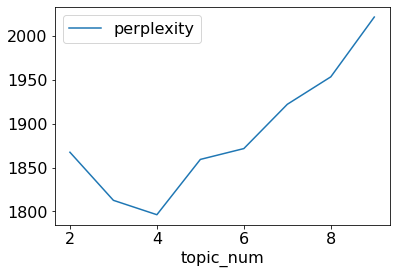

In [ ]:
result.plot.line(x='topic_num', y='perplexity')

<AxesSubplot:xlabel='topic_num'>

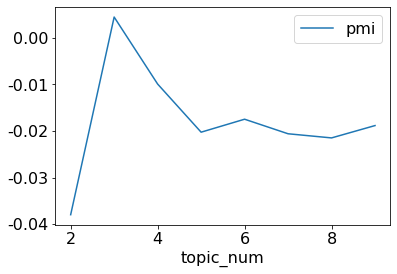

In [ ]:
result.plot.line(x='topic_num', y='pmi')

**選擇3個主題數應該是不錯的選擇**

In [ ]:
ldamodel = LdaModel(
    corpus= corpus, 
    id2word= dictionary, # 字典
    num_topics= 3, # 生成幾個主題數
    random_state= 2023, # 亂數
    iterations= 100,
    passes = 5
)

2023-06-11 23:09:52,909 : INFO : using symmetric alpha at 0.3333333333333333
2023-06-11 23:09:52,910 : INFO : using symmetric eta at 0.3333333333333333
2023-06-11 23:09:52,914 : INFO : using serial LDA version on this node
2023-06-11 23:09:52,918 : INFO : running online (multi-pass) LDA training, 3 topics, 5 passes over the supplied corpus of 3071 documents, updating model once every 2000 documents, evaluating perplexity every 3071 documents, iterating 100x with a convergence threshold of 0.001000
2023-06-11 23:09:52,918 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-06-11 23:09:52,921 : INFO : PROGRESS: pass 0, at document #2000/3071
2023-06-11 23:09:55,286 : INFO : merging changes from 2000 documents into a model of 3071 documents
2023-06-11 23:09:55,289 : INFO : topic #0 (0.333): 0.054*"館長" + 0.011*"toyz" + 0.009*"直播" + 0.009*"黑道" + 0.009*"現在" + 0.008*"新聞" + 0.007*"便當" + 0.007*"民進黨" + 0.007*"台

In [ ]:
ldamodel.print_topics()

2023-06-11 23:10:35,527 : INFO : topic #0 (0.333): 0.076*"館長" + 0.013*"toyz" + 0.013*"直播" + 0.012*"便當" + 0.010*"現在" + 0.009*"有沒有" + 0.007*"八卦" + 0.007*"知道" + 0.006*"東西" + 0.006*"最頂"
2023-06-11 23:10:35,529 : INFO : topic #1 (0.333): 0.018*"館長" + 0.015*"toyz" + 0.012*"台灣" + 0.007*"現在" + 0.006*"黑道" + 0.005*"知道" + 0.005*"社會" + 0.005*"問題" + 0.004*"販毒" + 0.004*"直播"
2023-06-11 23:10:35,531 : INFO : topic #2 (0.333): 0.033*"館長" + 0.020*"新聞" + 0.013*"完整" + 0.011*"媒體" + 0.011*"toyz" + 0.010*"民進黨" + 0.009*"直播" + 0.008*"表示" + 0.007*"記者" + 0.007*"台灣"


[(0,
  '0.076*"館長" + 0.013*"toyz" + 0.013*"直播" + 0.012*"便當" + 0.010*"現在" + 0.009*"有沒有" + 0.007*"八卦" + 0.007*"知道" + 0.006*"東西" + 0.006*"最頂"'),
 (1,
  '0.018*"館長" + 0.015*"toyz" + 0.012*"台灣" + 0.007*"現在" + 0.006*"黑道" + 0.005*"知道" + 0.005*"社會" + 0.005*"問題" + 0.004*"販毒" + 0.004*"直播"'),
 (2,
  '0.033*"館長" + 0.020*"新聞" + 0.013*"完整" + 0.011*"媒體" + 0.011*"toyz" + 0.010*"民進黨" + 0.009*"直播" + 0.008*"表示" + 0.007*"記者" + 0.007*"台灣"')]

In [ ]:
# 使用get_document_topics()` 回去看每篇文章的主題分佈 (`theta`)
ldamodel.get_document_topics(corpus[0])

[(0, 0.6420268), (1, 0.22890952), (2, 0.12906371)]

## 4. 視覺化呈現

**產生 LDAvis 結果**

LDAvis 是我們經常會使用的視覺化工具，目的為幫助我們解釋主題模型中，在我們建構好主題模型得到 θ(文件的主題分佈) 跟 φ(主題的字分佈)，透過 pyLDAvis 將主題降維成二維，以網頁的形式供我們查看。

+ 圓越大代表 document 越大
+ 右邊可以看到主題的字分佈
+ 右上幫有一個 bar 調整 lambda：當 lambda=1 也就是代表本來的字分佈 φ，將 lambda 縮越小可以看到越唯一的字，好的分佈是 φ 高且唯一，因此我們要在這兩者間取平衡
+ 圓心越相近，代表主題會越相似；反之，圓心分越開代表主題有唯一性<br>
  --> 假設詞彙本來有 100 字，維度應該是 100，假如本來維度接近(相近)的話，降維後也會接近(相近)


In [ ]:
best_model = LdaModel(
    corpus = corpus,
    num_topics = 3,
    id2word=dictionary,
    random_state = 1500,
    iterations = 100,
    passes = 5 # 訓練次數
    )

2023-06-11 23:22:12,034 : INFO : using symmetric alpha at 0.3333333333333333
2023-06-11 23:22:12,035 : INFO : using symmetric eta at 0.3333333333333333
2023-06-11 23:22:12,038 : INFO : using serial LDA version on this node
2023-06-11 23:22:12,042 : INFO : running online (multi-pass) LDA training, 3 topics, 5 passes over the supplied corpus of 3071 documents, updating model once every 2000 documents, evaluating perplexity every 3071 documents, iterating 100x with a convergence threshold of 0.001000
2023-06-11 23:22:12,043 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-06-11 23:22:12,045 : INFO : PROGRESS: pass 0, at document #2000/3071
2023-06-11 23:22:14,421 : INFO : merging changes from 2000 documents into a model of 3071 documents
2023-06-11 23:22:14,424 : INFO : topic #0 (0.333): 0.048*"館長" + 0.012*"民進黨" + 0.010*"toyz" + 0.008*"直播" + 0.007*"現在" + 0.006*"黑道" + 0.005*"新聞" + 0.005*"媒體" + 0.004*"表

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(best_model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.039836 -0.120560       1        1  39.905434
0     -0.102560  0.089689       2        1  32.658646
2      0.142395  0.030871       3        1  27.435920, topic_info=      Term         Freq        Total Category  logprob  loglift
3228    便當   547.000000   547.000000  Default  30.0000  30.0000
160    民進黨   568.000000   568.000000  Default  29.0000  29.0000
44      新聞   775.000000   775.000000  Default  28.0000  28.0000
2305  toyz  1465.000000  1465.000000  Default  27.0000  27.0000
29      黑道   554.000000   554.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
32      粉絲   130.683254   272.328898   Topic3  -5.5473   0.5591
136     最後   129.269294   310.852055   Topic3  -5.5582   0.4159
939     知道   158.361104   632.473048   Topic3  -5.3552  -0.0914
138     現在   150.461958   906.459768   Topic3  -5.4064  -0.5025
1206   陳之漢   111.908163   202.610768   Topic3  -5.7024   0.6997

[238 rows x 6 columns], token_table=      Topic      Freq Term
term                      
287       1  0.018192  220
287       2  0.006064  220
287       3  0.976296  220
4519      3  0.985227  260
4354      1  0.965076  333
...     ...       ...  ...
29        3  0.016224   黑道
897       1  0.071273   黑金
897       2  0.912293   黑金
897       3  0.014255   黑金
2894      2  0.982670   黨員

[426 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

### 各主題的內容解析
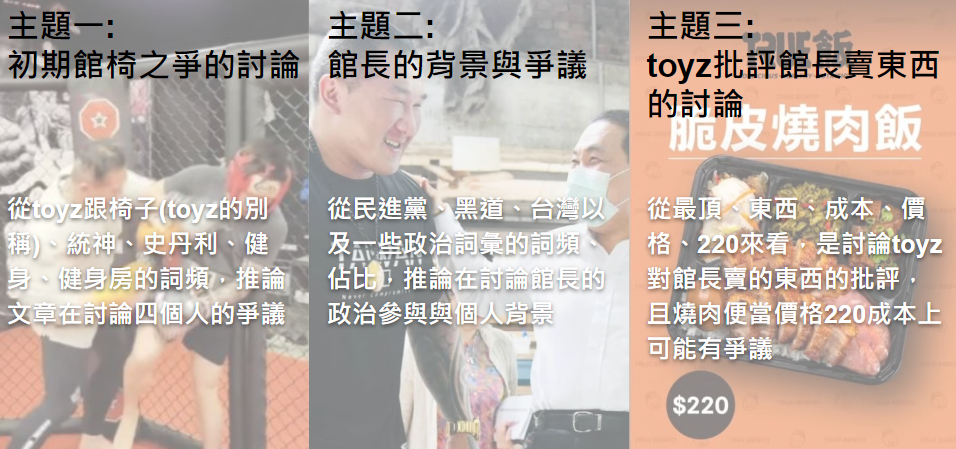  
館長也曾嗆聲:「民進黨都是黑道。」

In [ ]:
pyLDAvis.save_html(p, "lda_zh.html")

# 社會網路圖

In [ ]:
import pandas as pd
import numpy as np
import pyvis
import networkx as nx
import IPython

In [ ]:
raw_data = pd.read_csv('./raw_data/zh/toyz2.csv')
raw_data = raw_data[raw_data.artComment != '[]']
raw_data = raw_data.sample(round(raw_data.shape[0]/50), random_state = 123)
print(raw_data.shape)
raw_data.head(19)

(19, 11)


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
172,173,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,[問卦]B17跟椅子差在哪裡,2023-04-05 02:58:53,funsky,Gossiping,欸欸\n小妹妹很好奇\n為什麼\nB17 忠貞館粉 當初打館長\n圖文並茂 前因後果也寫的很...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""KurumiNoah"",...",111.246.104.252,2023-04-06 01:25:25,ptt
394,395,https://www.ptt.cc/bbs/Gossiping/M.1681318495....,[問卦]中國城市舉辦白粥節麵食節大家會捐錢嗎,2023-04-13 00:54:53,hihjk,Gossiping,中國近年環境議題嚴重\n尤其墓地供品食材沒有妥善處裡 孳生蚊蠅 對環境造成惡劣影響\n自抗疫...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""OPPAISuki"", ...",61.223.228.46,2023-04-13 01:36:24,ptt
206,207,https://www.ptt.cc/bbs/Gossiping/M.1680696086....,[問卦]toyz粉這樣倒讚館長有用嗎,2023-04-05 20:01:24,ss8901234,Gossiping,自從館長跟toyz戰了之後\n\n椅粉會每一部直播影片都倒讚\n\n雖然這樣\n\n館長還是...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""su4vu6"", ""cm...",220.142.89.247,2023-04-06 01:31:27,ptt
765,766,https://www.ptt.cc/bbs/Gossiping/M.1682018544....,[問卦]部長為什比館長不紅?,2023-04-21 03:22:20,dahanjian,Gossiping,八卦北鼻 打給賀\n\n剛剛部長張育成又幹出一支全壘打\n\n台灣棒賽是國球 他又是世界頂級...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""fman"", ""cmtC...",111.254.162.189,2023-04-22 01:28:03,ptt
338,339,https://www.ptt.cc/bbs/Gossiping/M.1681128773....,[問卦]館長跟泰森無規則對打誰贏,2023-04-10 20:12:51,subcrew,Gossiping,如題\n\n館長跟拳王泰森\n\n如果打拳擊規則 一定泰森贏\n\n館長專長是MMA無規則對...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""kent"", ""cmtC...",42.76.156.211,2023-04-11 01:31:41,ptt
803,804,https://www.ptt.cc/bbs/Gossiping/M.1682094940....,[問卦]館長賣火鍋價位會在哪裡,2023-04-22 00:35:38,kiwi47,Gossiping,安安 八卦版的各位\n\n明年進軍火鍋界「店名都想好了」\n\n館長：有你們我一定成功\n\...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ralfeistein""...",185.189.163.179,2023-04-22 01:37:53,ptt
894,895,https://www.ptt.cc/bbs/Gossiping/M.1682429012....,[問卦]館長為什麼不出line貼圖,2023-04-25 21:23:30,KENDO777,Gossiping,如題\n\n館長最近流量跟討論度很好\n\n為什麼館長不趁這波流量去賣迷音貼圖\n\n比如說...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""kcclasaki"", ...",101.3.126.89,2023-04-26 01:34:33,ptt
878,879,https://www.ptt.cc/bbs/Gossiping/M.1682392199....,[問卦]toyz怎麼沒繼續打館長商品,2023-04-25 11:09:57,qm21,Gossiping,toyz怎麼沒繼續打館長商品\n\n雖然烏龍好幾次\n\n反正打錯toyz也會裝沒事\n椅粉...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""Citer"", ""cmt...",61.231.45.162,2023-04-26 01:28:03,ptt
890,891,https://www.ptt.cc/bbs/Gossiping/M.1682424595....,[問卦]館長徒步環島被黑衣人跟會說什麼,2023-04-25 20:09:53,goddamnhuge,Gossiping,如果今天不是企鵝妹徒步環島\n\n而是館長徒步環島的話\n\n看到黑衣人一直偷偷跟隨著他\n...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""yu7038"", ""cm...",118.150.232.27,2023-04-26 01:33:36,ptt
302,303,https://www.ptt.cc/bbs/Gossiping/M.1681018122....,[問卦]館長:社會就是沒辦法接受我這種人,2023-04-09 13:28:40,katarina0911,Gossiping,如題\n昨天館長直播講了一段話\n\n館長:\n社會就是沒辦法接受我這種人 整天有事沒事就打...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""lovea"", ""cmt...",36.225.68.97,2023-04-10 01:30:00,ptt


先sample一部分資料作為觀察對象，我們選用4月toyz館長吵得最激烈的時候作為sample對象，

In [ ]:
#parse comment

def getComtInfo(com):
  cmters,cmt_statuss = [],[]
  com = eval(com)
  for i in com:
    print(i)
    cmters.append(i['cmtPoster'])
    cmt_statuss.append(i['cmtStatus'])
  return pd.Series([cmters, cmt_statuss])

raw_data[['artComter','artStatus']] = raw_data['artComment'].apply(lambda r: getComtInfo(r))

{'cmtStatus': '推', 'cmtPoster': 'KurumiNoah', 'cmtContent': ':一個有流量一個沒有', 'cmtDate': '2023-04-05 02:59:00'}
{'cmtStatus': '→', 'cmtPoster': 'su4vu6', 'cmtContent': ':娛樂性差這麼多誰會想看一堆文字', 'cmtDate': '2023-04-05 02:59:00'}
{'cmtStatus': '→', 'cmtPoster': 'kissmickey', 'cmtContent': ':沒吸跟有吸', 'cmtDate': '2023-04-05 03:00:00'}
{'cmtStatus': '→', 'cmtPoster': 'aa01081008tw', 'cmtContent': ':流量.口才.', 'cmtDate': '2023-04-05 03:01:00'}
{'cmtStatus': '→', 'cmtPoster': 'maple0603', 'cmtContent': ':影片與文字的差別', 'cmtDate': '2023-04-05 03:02:00'}
{'cmtStatus': '噓', 'cmtPoster': 'GGrunrundela', 'cmtContent': ':蕩戶半夜不睡還發文', 'cmtDate': '2023-04-05 03:02:00'}
{'cmtStatus': '推', 'cmtPoster': 'wdouglas', 'cmtContent': ':一個開分身一直被抓包，當然有差', 'cmtDate': '2023-04-05 03:31:00'}
{'cmtStatus': '推', 'cmtPoster': 'rei196', 'cmtContent': ':流量怪物跟魯蛇的差別', 'cmtDate': '2023-04-05 04:29:00'}
{'cmtStatus': '噓', 'cmtPoster': 's942816', 'cmtContent': ':跟一堆腦包議員能當選一樣', 'cmtDate': '2023-04-05 08:47:00'}
{'cmtStatus': '推', 'cmtPoster'

In [ ]:
raw_data = raw_data.explode(['artComter','artStatus'])
socail_data = raw_data[['artUrl','artPoster','artComter','artStatus']]
socail_data.head(10)

,artUrl,artPoster,artComter,artStatus
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,KurumiNoah,推
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,su4vu6,→
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,kissmickey,→
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,aa01081008tw,→
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,maple0603,→
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,GGrunrundela,噓
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,wdouglas,推
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,rei196,推
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,s942816,噓
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,ALOVET,推


In [ ]:
socail_data.artStatus.unique()

array(['推', '→', '噓'], dtype=object)

## 1. 簡單劃出文章、發文者、評論者的網路

In [ ]:
# 建立邊的資料
import random


po_df = socail_data[['artPoster','artUrl']].drop_duplicates().rename(columns = {'artPoster':'src','artUrl':'dis'})
sample_url = random.choices(po_df.dis.unique().tolist(),k=300)
po_df = po_df[po_df.dis.isin(sample_url)]
re_df = socail_data[['artComter','artUrl','artStatus']].rename(columns = {'artComter':'src','artUrl':'dis','artStatus':'weight'})
re_df = re_df[re_df.dis.isin(sample_url)]
re_df = re_df[~re_df['src'].isna()]



def convertStatus(s):
  if s == '推':
    return 2
  elif s == '→':
    return 1
  else :
    return -1
re_df['weight'] = re_df['weight'].map(convertStatus)
re_df = re_df.groupby(['src','dis']).sum().reset_index()

# 設定分數低的為紅色
def getColor(w):
  if w>0:
    return 'green'
  else:
    return 'red'
re_df['color'] = re_df.weight.map(getColor)



In [ ]:
re_df

,src,dis,weight,color
0,A80211ab,https://www.ptt.cc/bbs/Gossiping/M.1682006677....,1,green
1,AE86,https://www.ptt.cc/bbs/Gossiping/M.1680597437....,6,green
2,ALOVET,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,2,green
3,ALOVET,https://www.ptt.cc/bbs/Gossiping/M.1680694609....,-2,red
4,ALOVET,https://www.ptt.cc/bbs/Gossiping/M.1680696086....,3,green
...,...,...,...,...
1495,zorroptt,https://www.ptt.cc/bbs/Gossiping/M.1682771351....,3,green
1496,zsp8084,https://www.ptt.cc/bbs/Gossiping/M.1682006677....,-1,red
1497,zsxa1234,https://www.ptt.cc/bbs/Gossiping/M.1682006677....,0,red
1498,zxcv91039,https://www.ptt.cc/bbs/Gossiping/M.1681018122....,6,green


In [ ]:
re_df['dis'].value_counts()

https://www.ptt.cc/bbs/Gossiping/M.1682006677.A.422.html    543
https://www.ptt.cc/bbs/Gossiping/M.1681018122.A.4C4.html    444
https://www.ptt.cc/bbs/Gossiping/M.1680333045.A.C7D.html    178
https://www.ptt.cc/bbs/Gossiping/M.1680597437.A.6A2.html    102
https://www.ptt.cc/bbs/Gossiping/M.1681128773.A.41C.html     39
https://www.ptt.cc/bbs/Gossiping/M.1682392199.A.28C.html     26
https://www.ptt.cc/bbs/Gossiping/M.1680694609.A.200.html     26
https://www.ptt.cc/bbs/Gossiping/M.1680540276.A.EC2.html     20
https://www.ptt.cc/bbs/Gossiping/M.1681712842.A.814.html     19
https://www.ptt.cc/bbs/Gossiping/M.1681726343.A.E5D.html     19
https://www.ptt.cc/bbs/Gossiping/M.1680696086.A.31D.html     14
https://www.ptt.cc/bbs/Gossiping/M.1681900308.A.644.html     13
https://www.ptt.cc/bbs/Gossiping/M.1682771351.A.DC4.html     12
https://www.ptt.cc/bbs/Gossiping/M.1680634735.A.F1E.html     11
https://www.ptt.cc/bbs/Gossiping/M.1682429012.A.7DA.html     10
https://www.ptt.cc/bbs/Gossiping/M.16820

In [ ]:
# 人為綠色節點
# po文為橘色節點

netWork = pyvis.network.Network(notebook=True, cdn_resources='in_line',directed=True)
person = list(set(po_df.src.unique().tolist()+re_df.src.unique().tolist()))
url = po_df.dis.unique().tolist()
netWork.add_nodes(
    nodes = person,
    value = [1 for i in range(len(person))],
    color = ['#66CDAA' for i in range(len(person))],
    title = person
)
netWork.add_nodes(
    nodes = url,
    value = [2 for i in range(len(url))],
    color = ['#FFB366' for i in range(len(url))],
    title = url
)
for i in po_df.to_numpy():
  netWork.add_edge(i[0],i[1],width = 2,color='grey')
for i in re_df.to_numpy():
  netWork.add_edge(i[0],i[1],width = 2,color=i[3])

# 設定layout
netWork.repulsion()

# netWork.toggle_physics(True)
# netWork.set_options("""
# const options = {
#   "physics": {
#     "forceAtlas2Based": {
#       "springLength": 100
#     },
#     "minVelocity": 0.75,
#     "solver": "forceAtlas2Based",
#     "timestep": 0.48
#   }
# }
# """)

netWork.show("./basic_netWork.html")
IPython.display.HTML('basic_netWork.html')

各篇文章的留言數:

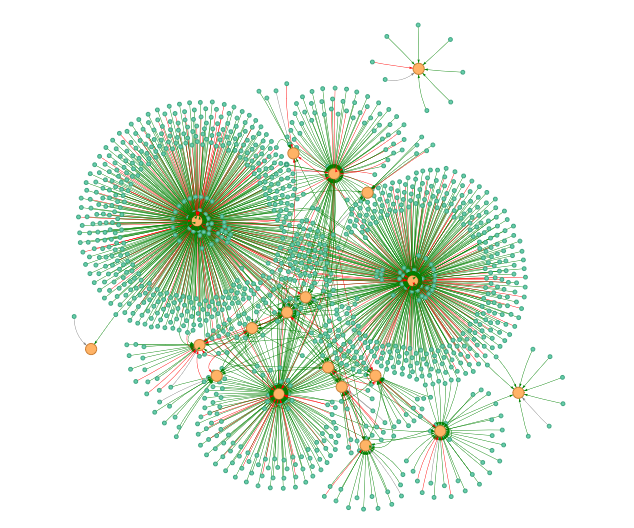

以上可以看出在此討論議題，造成非常大的轟動有兩篇有非常多留言，最多留言的一篇是在討論館長賣的便當的食材問題，可以看出大家對於食安問題關注的重要性

## 2. 計算網友之間的關係

In [ ]:
pos_cmt = socail_data.copy()
pos_cmt = pos_cmt[~pos_cmt.artComter.isna()]
pos_cmt.head(10)

,artUrl,artPoster,artComter,artStatus
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,KurumiNoah,推
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,su4vu6,→
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,kissmickey,→
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,aa01081008tw,→
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,maple0603,→
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,GGrunrundela,噓
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,wdouglas,推
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,rei196,推
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,s942816,噓
172,https://www.ptt.cc/bbs/Gossiping/M.1680634735....,funsky,ALOVET,推


In [ ]:
pos_cmt['score'] = pos_cmt['artStatus'].apply(lambda r: convertStatus(r))
pos_cmt = pos_cmt.groupby(['artComter','artPoster']).sum('score').reset_index()
pos_cmt = pos_cmt[pos_cmt.score>=0]
pos_cmt = pos_cmt[pos_cmt.artComter != pos_cmt.artPoster]
# pos_cmt.score = 1
pos_cmt

,artComter,artPoster,score
0,A80211ab,KENDO777,1
1,AE86,kenny1300175,6
2,ALOVET,funsky,2
3,ALOVET,katarina0911,0
4,ALOVET,ss8901234,3
...,...,...,...
1447,zorroptt,lagxp,2
1448,zorroptt,qazStarStar,3
1450,zsxa1234,KENDO777,0
1451,zxcv91039,katarina0911,6


In [ ]:
pers = np.unique(pos_cmt[['artComter', 'artPoster']])
mat = pd.pivot_table(pos_cmt,index = 'artComter', columns = 'artPoster' ,values='score' ).fillna(0)\
  .reindex(columns=pers, index=pers, fill_value=0).to_numpy()
print(mat.shape)
tri = (np.tril(mat,-1).T + np.triu(mat,1))
mat_s = tri+tri.T

# # print((mat == mat.transpose()).all())

# G = nx.DiGraph(mat)
# G_sub = sorted(nx.connected_components(G), key=len, reverse=True)
# G_max_sub = G.subgraph(G_sub[0])
# # 重新定義 mat
# mat = nx.adjacency_matrix(G_max_sub).todense()
# node_idx = list(G_max_sub.nodes)
# # mat = mat[np.ix_(node_idx,node_idx)]
# pers = pers[node_idx]
# print((mat == mat.transpose()).all())

# # 計算無向圖的adj


(1052, 1052)


In [ ]:
def random_color():
  r = lambda: random.randint(0,255)
  return '#%02X%02X%02X' % (r(),r(),r())

def matPresentGraph(mat:np.array,node_id:list,node_type:list=None,node_value:list = None,directed = True,edge_color=None) -> pyvis.network.Network:

  if directed != True:
    if (mat == mat.transpose()).all():
      print('matrix is Symmetric')
    else:
      print('matrix is not Symmetric')
  if node_type == None:
    c = random_color()
    node_colors = [c for i in range(len(node_id))]
    node_type = [" " for i in range(len(node_id))]
  else:
    node_color_map = {}
    for i in set(node_type):
      while True:
        c = random_color()
        if c not in node_color_map.values():
          break
      node_color_map[i] = c
    node_colors = [node_color_map[i] for i in node_type]
  # print(node_colors)
  if edge_color == None:
    edge_color = random_color()
  edge_color = random_color()
  if node_value == None:
    node_value = [1 for i in range(len(node_id))]

  net = pyvis.network.Network(notebook=True, directed = directed, cdn_resources='in_line')
  
  titles_list = []
  for i ,j in zip(node_id,node_type):
    titles_list.append(str(i)+":"+str(j))

  net.add_nodes(
      nodes = node_id,
      value = node_value,
      label = node_id,
      title = titles_list,
      color = node_colors
  )

  for row in range(len(node_id)):
    for col in range(len(node_id)):
      if mat[row][col]>0.:
        net.add_edge(
            node_id[row],node_id[col],width = mat[row][col],color = edge_color,title = mat[row][col]
        )
  net.repulsion()
  return net


In [ ]:
# 定義發文者（po）、評論者(cmt)、兩者兼具(both)
node_type = []

cmt_list = pos_cmt['artComter'].unique().tolist()
po_list = pos_cmt['artPoster'].unique().tolist()
both_list = list(set(cmt_list) & set(po_list))
for p in pers:
  if p in both_list:
    node_type.append('both')

  elif p in cmt_list:
    node_type.append('cmt')

  elif p in po_list:
    node_type.append('po')



In [ ]:
net = matPresentGraph(mat = mat,node_id = pers,node_type = node_type)
net.show("./pers_netWork.html")
IPython.display.HTML('pers_netWork.html')

網友關係圖:

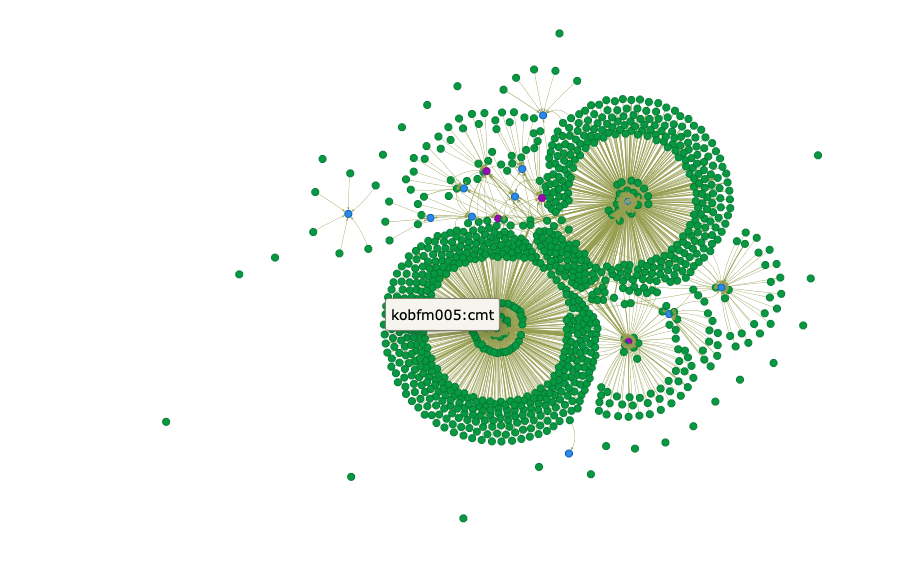

## 3. 計算留言者對於發文者的關係
通常具有較多留言次數的箭頭會較粗

- 計算eigenvector centrality （無向圖）

In [ ]:

eigenvec = np.array(list(nx.eigenvector_centrality(nx.Graph(mat_s),max_iter = 10000).values()))
eigenvec = (eigenvec-np.min(eigenvec))/(np.max(eigenvec)-np.min(eigenvec))


In [ ]:
q = np.quantile(eigenvec,[.2,.4,.6,.8])
q

array([0.01639681, 0.01639681, 0.0405764 , 0.0405764 ])

In [ ]:
node_value = []


for i in eigenvec:

  if i > q[3]:
    node_value.append(25)
  elif i >q[2]:
    node_value.append(20)
  elif i>q[1]:
    node_value.append(15)
  elif i>q[0]:
    node_value.append(10)
  else:
    node_value.append(5)
net = matPresentGraph(mat = mat,node_id = pers,node_type = node_type,node_value = node_value,directed=False)
net.show("./pers_eig_netWork.html")
IPython.display.HTML('pers_eig_netWork.html')


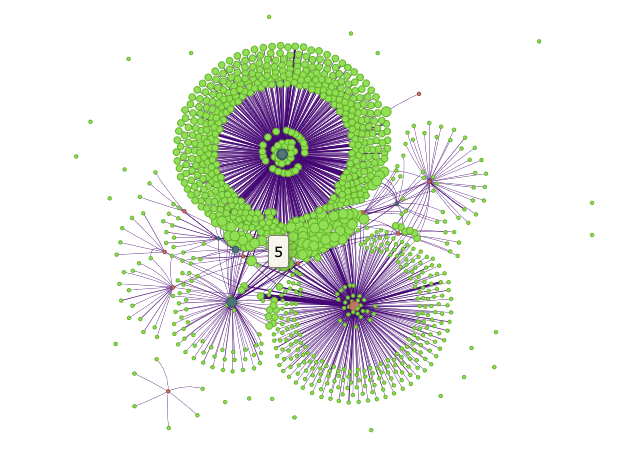

我們可以發現有多次評論的人，或是評論的文章同時有多人評論的，重要程度愈高，節點的大小越大

- PageRank (有向圖)

In [ ]:
# Digraph 設定有向圖
pagerank = np.array(list(nx.pagerank(nx.DiGraph(mat)).values()))
# pagerank = (pagerank-np.min(pagerank))/(np.max(pagerank)-np.min(pagerank))
pagerank

array([0.00041489, 0.00041489, 0.00041489, ..., 0.00041489, 0.00041489,
       0.00041489])

In [ ]:
net = matPresentGraph(mat = mat,node_id = pers,node_type = node_type,node_value=(pagerank*1000).tolist())
net.show("./pers_page_netWork.html")
IPython.display.HTML('pers_page_netWork.html')


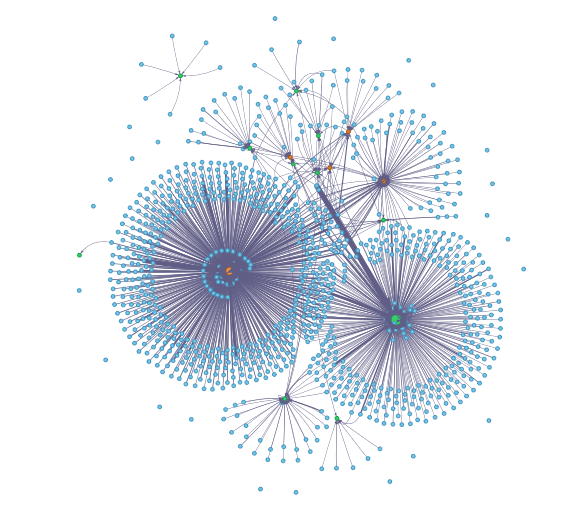

可以看出indegree 較多，重要程度愈高，在這張圖中，indegree較多的（大型討論版）的重要程度及節點大小較大

- Hits score （有向圖）

In [ ]:
out_,in_ = nx.hits(nx.DiGraph(mat),max_iter=100)
out_,in_ = np.array(list(out_.values())),np.array(list(in_.values()))
out_ = (out_-np.min(out_))/(np.max(out_)-np.min(out_))
in_ = (in_-np.min(in_))/(np.max(in_)-np.min(in_))


In [ ]:
in_q = np.quantile(in_,[.2,.4,.6,.8])
out_q = np.quantile(out_,[.2,.4,.6,.8])


In [ ]:
in_q

array([1.98078365e-19, 1.98078365e-19, 1.98078365e-19, 1.98078365e-19])

In [ ]:
node_value = []


for i in out_:
  if i > out_q[3]:
    node_value.append(25)
  elif i >out_q[2]:
    node_value.append(20)
  elif i>out_q[1]:
    node_value.append(15)
  elif i>out_q[0]:
    node_value.append(10)
  else:
    node_value.append(5)

net = matPresentGraph(mat = mat,node_id = pers,node_type = node_type,node_value=node_value)
net.show("./pers_out_netWork.html")
IPython.display.HTML('pers_out_netWork.html')

In [ ]:
node_value = []
for i in in_:
  if i > in_q[3]:
    node_value.append(25)
  elif i >in_q[2]:
    node_value.append(20)
  elif i>in_q[1]:
    node_value.append(15)
  elif i>in_q[0]:
    node_value.append(10)
  else:
    node_value.append(5)

net = matPresentGraph(mat = mat,node_id = pers,node_type = node_type,node_value=node_value)
net.show("./pers_in_netWork.html")
IPython.display.HTML('pers_in_netWork.html')

outdegree:

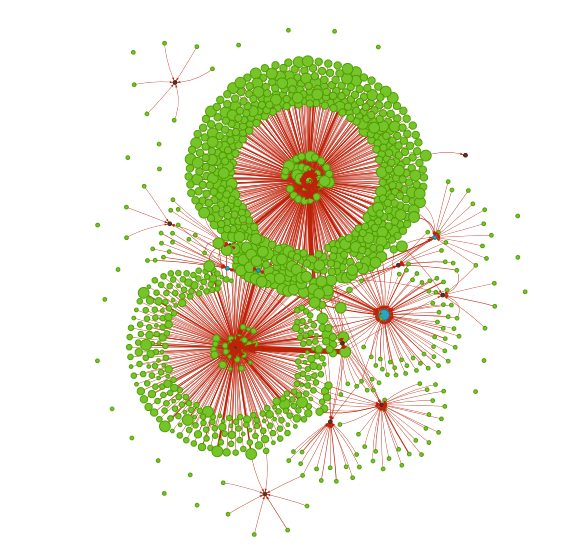

可以發現indegree/outdegree的多寡會決定其重要程度

- betweenness centrality

In [ ]:
bet = np.array(list(nx.betweenness_centrality(nx.Graph(mat_s)).values()))
bet = (bet-np.min(bet))/(np.max(bet)-np.min(bet))
bet_q = np.quantile(bet,[.2,.4,.6,.8])

In [ ]:
node_value = []
for i in bet:
  if i > bet_q[3]:
    node_value.append(25)
  elif i > bet_q[2]:
    node_value.append(20)
  elif i>bet_q[1]:
    node_value.append(15)
  elif i>bet_q[0]:
    node_value.append(10)
  else:
    node_value.append(5)

net = matPresentGraph(mat = mat,node_id = pers,node_type = node_type,node_value=node_value)
net.show("./pers_bet_netWork.html")
IPython.display.HTML('pers_bet_netWork.html')

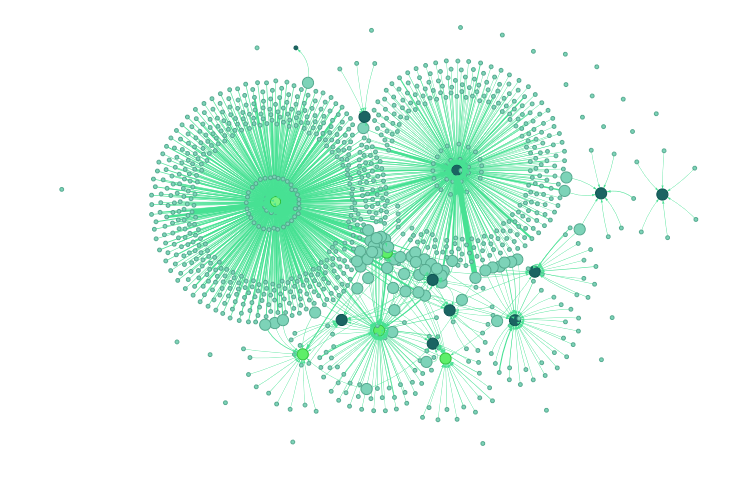

可以看到有些留言者在多個討論版中進行留言，作為中介者的角色，這種節點都會有較大的趨勢，這些留言者的留言對於整個討論版有重要程度的影響


- 計算最大的subgraph 的 measure

In [ ]:
# 計算max subgraph
G = nx.Graph(mat_s)
G_sub = sorted(nx.connected_components(G), key=len, reverse=True)
G_max_sub = G.subgraph(G_sub[0])
# # 重新定義 mat
sub_mat = nx.adjacency_matrix(G_max_sub).todense()
node_idx = list(G_max_sub.nodes)
sub_pers = pers[node_idx]


- 畫出最大subgraph

In [ ]:
net = matPresentGraph(mat=sub_mat,node_id=sub_pers,directed=False)
net.show("./max_sub.html")
IPython.display.HTML('max_sub.html')

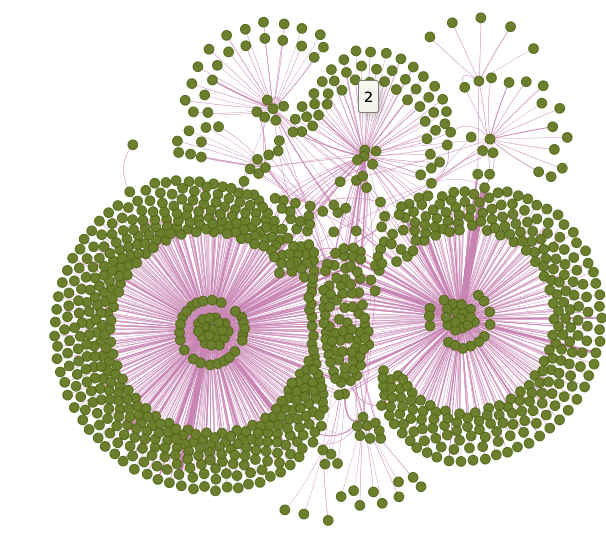

- 其實在我們sample出來的討論版中，每個文章之間都是有關連的，代表在這類型的文章中，較不會有小型群體的出現，原本以為網友會被分成兩派分別館長派及toyz派，但透過這張圖發現每個留言版之間的留言者容易去其他不同群體留言，討論意見

# 結論

**期末我們延續期中報告，使用主題模型找出最佳主題數，並且抽取出主題分佈與視覺化分析。而後繪製了社群網絡圖，來看ptt上網友的互動網絡，從各種關係與數據來看討論館椅之爭的網友特性**
- 從主題模型中，我們看到toyz與館長之爭中很重要的三個部分：起初的爭議點、toyz館長兩人互相攻擊、館長個人背景的討論
- 從社群網絡圖中，我們得到不少資訊。首先我們從留言多寡看到網友都很關注食安問題。有許多固定關注的留言者，常駐於多個發文底下討論。最後，我們原本認為網友會被分成兩派：館長派及toyz派，但我們發現每個人都很可能到各個發文下面留言討論
- 從圖中重要點抓出的網友，多是在PPT活動頻繁的留言者，並不是特別關注館長和toyz的人，但是也有利用關係圖發現特別關注館椅大戰的人